In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/pbl research/BTC-USD.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-10-11,361.362000,367.191010,355.950989,362.299011,362.299011,13345200
1,2014-10-12,362.605988,379.433014,356.144012,378.549011,378.549011,17552800
2,2014-10-13,377.920990,397.226013,368.897003,390.414001,390.414001,35221400
3,2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,38491500
4,2014-10-15,400.954987,402.226990,388.765991,394.773010,394.773010,25267100


In [4]:
# Drop the 'Date' column as it's not needed for modeling
data = data.drop(columns=['Date'])

In [5]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# Define the number of time steps for the GRU model
time_steps = 10  # You can adjust this according to your need

In [7]:
# Prepare data with time steps
X = []
y = []
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps, :])
    y.append(data_scaled[i+time_steps, 1])  # Assuming 'Open' price is the target

X = np.array(X)
y = np.array(y)

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [9]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(64, activation='sigmoid', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, activation='sigmoid', return_sequences=True))
model.add(LSTM(64, activation='sigmoid', return_sequences=True))
model.add(LSTM(64, activation='sigmoid', return_sequences=True))
model.add(LSTM(64, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [11]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
41/41 [==============================] - 11s 63ms/step - loss: 0.0763 - mae: 0.2257 - val_loss: 0.1194 - val_mae: 0.3024
Epoch 2/50
41/41 [==============================] - 2s 57ms/step - loss: 0.0476 - mae: 0.1370 - val_loss: 0.1200 - val_mae: 0.3033
Epoch 3/50
41/41 [==============================] - 3s 79ms/step - loss: 0.0475 - mae: 0.1416 - val_loss: 0.1162 - val_mae: 0.2970
Epoch 4/50
41/41 [==============================] - 2s 56ms/step - loss: 0.0474 - mae: 0.1423 - val_loss: 0.1148 - val_mae: 0.2947
Epoch 5/50
41/41 [==============================] - 2s 46ms/step - loss: 0.0475 - mae: 0.1418 - val_loss: 0.1137 - val_mae: 0.2928
Epoch 6/50
41/41 [==============================] - 2s 43ms/step - loss: 0.0475 - mae: 0.1439 - val_loss: 0.1140 - val_mae: 0.2932
Epoch 7/50
41/41 [==============================] - 2s 47ms/step - loss: 0.0474 - mae: 0.1428 - val_loss: 0.1157 - val_mae: 0.2961
Epoch 8/50
41/41 [==============================] - 2s 44ms/step - loss: 0.0475 - 

In [12]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

21/21 [==============================] - 0s 10ms/step - loss: 0.0182 - mae: 0.1015
Mean Absolute Error: 0.10150665044784546


In [13]:
# Make predictions
predictions = model.predict(X_test)

21/21 [==============================] - 1s 10ms/step


In [14]:
# Inverse transform the predictions and true values to the original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], predictions), axis=1))[:, -1]
true_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]

In [15]:
import matplotlib.pyplot as plt

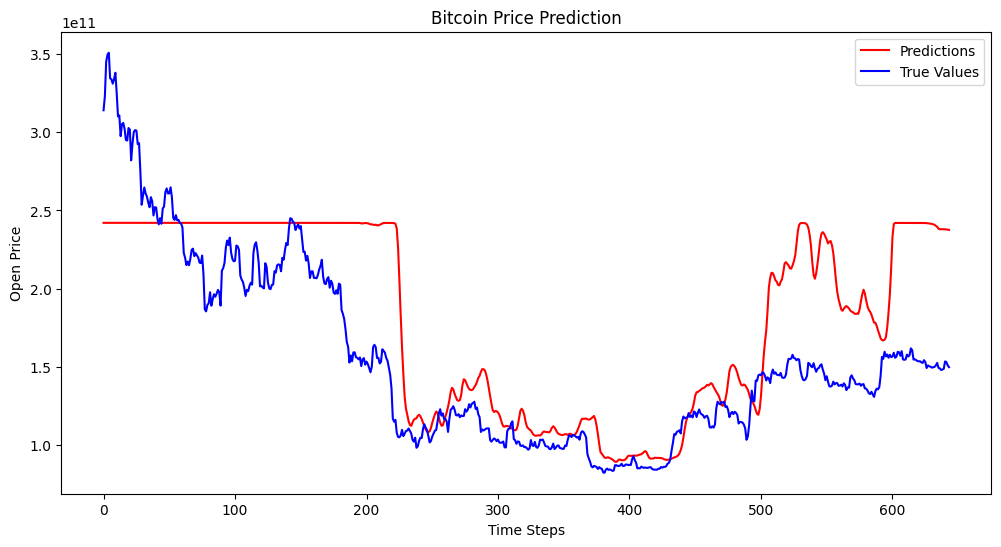

In [16]:
# Plot predictions vs. true values
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predictions', color='red')
plt.plot(true_values, label='True Values', color='blue')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Open Price')
plt.legend()
plt.show()

In [17]:
# Calculate percentage error
percentage_error = (abs(predictions - true_values) / true_values) * 100

# Print the percentage error
for i, error in enumerate(percentage_error):
    print(f"Sample {i+1}: Percentage Error = {error:.2f}%")

# Calculate and print the mean percentage error
mean_percentage_error = np.mean(percentage_error)
print("\nMean Percentage Error:", mean_percentage_error)

Sample 1: Percentage Error = 22.94%
Sample 2: Percentage Error = 25.06%
Sample 3: Percentage Error = 29.89%
Sample 4: Percentage Error = 30.77%
Sample 5: Percentage Error = 31.03%
Sample 6: Percentage Error = 27.64%
Sample 7: Percentage Error = 27.51%
Sample 8: Percentage Error = 26.90%
Sample 9: Percentage Error = 27.55%
Sample 10: Percentage Error = 28.41%
Sample 11: Percentage Error = 25.52%
Sample 12: Percentage Error = 21.96%
Sample 13: Percentage Error = 22.12%
Sample 14: Percentage Error = 18.64%
Sample 15: Percentage Error = 20.70%
Sample 16: Percentage Error = 20.89%
Sample 17: Percentage Error = 19.90%
Sample 18: Percentage Error = 17.97%
Sample 19: Percentage Error = 17.87%
Sample 20: Percentage Error = 20.04%
Sample 21: Percentage Error = 19.79%
Sample 22: Percentage Error = 14.18%
Sample 23: Percentage Error = 17.28%
Sample 24: Percentage Error = 19.37%
Sample 25: Percentage Error = 19.70%
Sample 26: Percentage Error = 19.60%
Sample 27: Percentage Error = 17.22%
Sample 28:

In [18]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and true values to the original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], predictions), axis=1))[:, -1]
true_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Define a threshold for investment decision
invest_threshold = 1.0  # You can adjust this threshold as needed

21/21 [==============================] - 0s 10ms/step


In [19]:
# Determine investment decisions and print the results
for i in range(len(predictions)):
    if predictions[i] > X_test[i, -1, 1] * invest_threshold:
        decision = "Invest"
    else:
        decision = "Do not invest"

    print(f"Predicted Price: {predictions[i]:.2f} | Current Open Price: {X_test[i, -1, 1]:.2f} | Decision: {decision}")


Predicted Price: 242069510448.79 | Current Open Price: 0.91 | Decision: Invest
Predicted Price: 242069991585.03 | Current Open Price: 0.90 | Decision: Invest
Predicted Price: 242071037533.38 | Current Open Price: 0.92 | Decision: Invest
Predicted Price: 242071121209.25 | Current Open Price: 0.98 | Decision: Invest
Predicted Price: 242070849262.68 | Current Open Price: 1.00 | Decision: Invest
Predicted Price: 242070660991.97 | Current Open Price: 1.00 | Decision: Invest
Predicted Price: 242071581426.52 | Current Open Price: 0.95 | Decision: Invest
Predicted Price: 242071748778.25 | Current Open Price: 0.95 | Decision: Invest
Predicted Price: 242071183966.15 | Current Open Price: 0.94 | Decision: Invest
Predicted Price: 242070849262.68 | Current Open Price: 0.95 | Decision: Invest
Predicted Price: 242070681910.94 | Current Open Price: 0.96 | Decision: Invest
Predicted Price: 242071581426.52 | Current Open Price: 0.93 | Decision: Invest
Predicted Price: 242073610566.31 | Current Open Pric

In [20]:
# Calculate daily price changes for true values and predictions
true_price_changes = true_values[1:] - true_values[:-1]
predicted_price_changes = predictions[1:] - true_values[:-1]

# Define a threshold for considering a change as profitable or in loss
profit_threshold = 0.0  # You can adjust this threshold based on your preference

# Calculate whether the predictions are in profit or loss
profit_or_loss = np.where(predicted_price_changes > profit_threshold, 'Profit', 'Loss')

# Print whether each prediction is in profit or loss
for i in range(len(profit_or_loss)):
    print(f"Prediction {i+1}: {profit_or_loss[i]}")

Prediction 1: Loss
Prediction 2: Loss
Prediction 3: Loss
Prediction 4: Loss
Prediction 5: Loss
Prediction 6: Loss
Prediction 7: Loss
Prediction 8: Loss
Prediction 9: Loss
Prediction 10: Loss
Prediction 11: Loss
Prediction 12: Loss
Prediction 13: Loss
Prediction 14: Loss
Prediction 15: Loss
Prediction 16: Loss
Prediction 17: Loss
Prediction 18: Loss
Prediction 19: Loss
Prediction 20: Loss
Prediction 21: Loss
Prediction 22: Loss
Prediction 23: Loss
Prediction 24: Loss
Prediction 25: Loss
Prediction 26: Loss
Prediction 27: Loss
Prediction 28: Loss
Prediction 29: Loss
Prediction 30: Loss
Prediction 31: Loss
Prediction 32: Loss
Prediction 33: Loss
Prediction 34: Loss
Prediction 35: Loss
Prediction 36: Loss
Prediction 37: Loss
Prediction 38: Loss
Prediction 39: Loss
Prediction 40: Loss
Prediction 41: Loss
Prediction 42: Loss
Prediction 43: Profit
Prediction 44: Loss
Prediction 45: Profit
Prediction 46: Loss
Prediction 47: Loss
Prediction 48: Loss
Prediction 49: Loss
Prediction 50: Loss
Predi

In [21]:
# Define a threshold for considering a trade profitable or in loss
profit_threshold = 0.02  # 2% profit
loss_threshold = -0.02   # 2% loss

# Calculate the price change from the previous day
price_change = true_values[1:] - true_values[:-1]

# Initialize lists to store trade decisions
trade_actions = []
trade_results = []

# Loop through the predictions and calculate trade decisions
for i in range(len(predictions)):
    if i == 0:
        trade_actions.append("HOLD")
        trade_results.append("N/A")
    else:
        if (predictions[i] - true_values[i-1]) / true_values[i-1] > profit_threshold:
            trade_actions.append("SELL")
            trade_results.append("Profit")
        elif (predictions[i] - true_values[i-1]) / true_values[i-1] < loss_threshold:
            trade_actions.append("SELL")
            trade_results.append("Loss")
        else:
            trade_actions.append("HOLD")
            trade_results.append("N/A")

# Print the trade decisions along with the results
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]:.2f}, True Value: {true_values[i]:.2f}, Action: {trade_actions[i]}, Result: {trade_results[i]}")


Prediction: 242069510448.79, True Value: 314125820495.24, Action: HOLD, Result: N/A
Prediction: 242069991585.03, True Value: 323011730761.13, Action: SELL, Result: Loss
Prediction: 242071037533.38, True Value: 345257172736.09, Action: SELL, Result: Loss
Prediction: 242071121209.25, True Value: 349640974296.85, Action: SELL, Result: Loss
Prediction: 242070849262.68, True Value: 350967941479.00, Action: SELL, Result: Loss
Prediction: 242070660991.97, True Value: 334536961928.76, Action: SELL, Result: Loss
Prediction: 242071581426.52, True Value: 333932052167.59, Action: SELL, Result: Loss
Prediction: 242071748778.25, True Value: 331142178528.30, Action: SELL, Result: Loss
Prediction: 242071183966.15, True Value: 334107913606.30, Action: SELL, Result: Loss
Prediction: 242070849262.68, True Value: 338132435673.20, Action: SELL, Result: Loss
Prediction: 242070681910.94, True Value: 325029169485.32, Action: SELL, Result: Loss
Prediction: 242071581426.52, True Value: 310200154263.76, Action: 